# Cat boost

In [1]:
import os
import sys

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from joblib import load
from catboost import CatBoostRegressor

In [2]:
sys.path.insert(0, "../..")
import problem

## Load data

In [3]:
X_train, y_train = problem.get_train_data("../..")
X_test, y_test = problem.get_test_data("../..")

## Cat boost with external data

In [4]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = ["year", "month", "weekday", "hour"]

add_date_encoder = FunctionTransformer(
    problem._additional_date_variables, kw_args={"drop_date": True}
)
add_date_cols = ["season"]

num_cols = ["temp", "dwpt", "rhum", "prcp", "wspd", "pres"]

categorical_cols = ["counter_name", "wdir"]

preprocessor = ColumnTransformer(
    [
        (
            "date",
            OneHotEncoder(handle_unknown="ignore", sparse=False),
            date_cols + add_date_cols,
        ),
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols),
    ],
)

regressor = CatBoostRegressor()

pipe = make_pipeline(
    FunctionTransformer(problem._merge_external_data, validate=False),
    date_encoder,
    add_date_encoder,
    preprocessor,
    regressor,
)
pipe.fit(X_train, y_train)

Learning rate set to 0.107689
0:	learn: 1.6001757	total: 327ms	remaining: 5m 26s
1:	learn: 1.5371004	total: 615ms	remaining: 5m 6s
2:	learn: 1.4860222	total: 865ms	remaining: 4m 47s
3:	learn: 1.4427488	total: 1.02s	remaining: 4m 15s
4:	learn: 1.4053492	total: 1.12s	remaining: 3m 42s
5:	learn: 1.3723866	total: 1.41s	remaining: 3m 52s
6:	learn: 1.3459261	total: 1.51s	remaining: 3m 34s
7:	learn: 1.3184409	total: 1.72s	remaining: 3m 32s
8:	learn: 1.2960474	total: 1.81s	remaining: 3m 19s
9:	learn: 1.2723235	total: 1.93s	remaining: 3m 11s
10:	learn: 1.2511257	total: 2.05s	remaining: 3m 4s
11:	learn: 1.2334238	total: 2.26s	remaining: 3m 6s
12:	learn: 1.2165623	total: 2.38s	remaining: 3m
13:	learn: 1.1961455	total: 2.5s	remaining: 2m 56s
14:	learn: 1.1783326	total: 2.72s	remaining: 2m 58s
15:	learn: 1.1635179	total: 2.82s	remaining: 2m 53s
16:	learn: 1.1504393	total: 2.9s	remaining: 2m 47s
17:	learn: 1.1374630	total: 3.01s	remaining: 2m 44s
18:	learn: 1.1261102	total: 3.21s	remaining: 2m 45s
1

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7fe57188b550>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x7fe57188b430>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fe57188b4c0>,
                                     kw_args={'dr...
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['year', 'month', 'weekday',
                                                   'hour', 'season']),
                                                 ('num', StandardScaler(),
                                                  ['temp', 'dwpt', 'rhum',
                                                   'prcp', 'wspd', 'pres']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['counter_name', 'wdir'])])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7fe5a0b56b80>)])

In [5]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

Train set, RMSE=0.47
Test set, RMSE=0.47


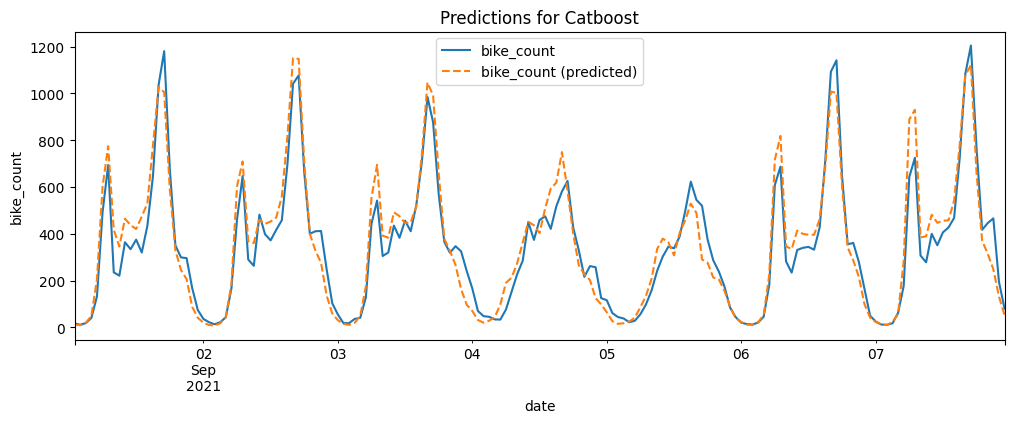

In [6]:
problem.week_plot(X_test, y_pred_test, y_test, "Catboost")

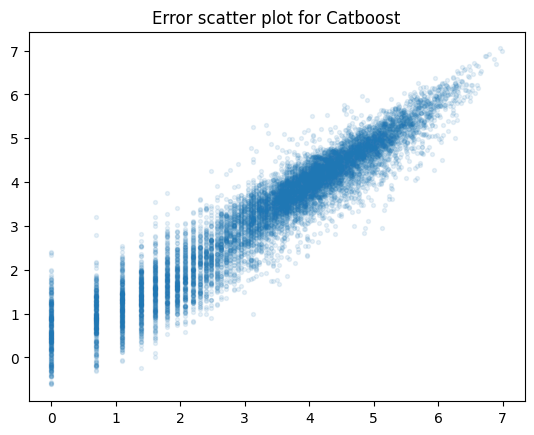

In [7]:
problem.error_plot(y_pred_test, y_test, "Catboost")

## Catboost without one-hot-encoding the features in preprocessing

In [8]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
add_date_encoder = FunctionTransformer(
    problem._additional_date_variables, kw_args={"drop_date": True}
)

categorical_feat = [
    "year",
    "month",
    "weekday",
    "hour",
    "season",
    "counter_name",
    "wdir",
]

num_cols = ["temp", "dwpt", "rhum", "prcp", "wspd", "pres"]

regressor = CatBoostRegressor(iterations=1100)

pipe = make_pipeline(
    FunctionTransformer(problem._merge_external_data, validate=False),
    date_encoder,
    add_date_encoder,
    FunctionTransformer(lambda x: x[num_cols + categorical_feat]),
    regressor,
)

pipe.fit(X_train, y_train, catboostregressor__cat_features=categorical_feat)

Learning rate set to 0.099659
0:	learn: 1.5603474	total: 578ms	remaining: 10m 34s
1:	learn: 1.4598850	total: 988ms	remaining: 9m 2s
2:	learn: 1.3705724	total: 1.27s	remaining: 7m 45s
3:	learn: 1.2913625	total: 1.6s	remaining: 7m 19s
4:	learn: 1.2231674	total: 2.04s	remaining: 7m 26s
5:	learn: 1.1637344	total: 2.53s	remaining: 7m 42s
6:	learn: 1.1045720	total: 2.86s	remaining: 7m 26s
7:	learn: 1.0511732	total: 3.24s	remaining: 7m 22s
8:	learn: 1.0050399	total: 3.75s	remaining: 7m 34s
9:	learn: 0.9656850	total: 4.16s	remaining: 7m 33s
10:	learn: 0.9319638	total: 4.49s	remaining: 7m 25s
11:	learn: 0.8996800	total: 4.97s	remaining: 7m 31s
12:	learn: 0.8699882	total: 5.53s	remaining: 7m 41s
13:	learn: 0.8453856	total: 5.81s	remaining: 7m 31s
14:	learn: 0.8239273	total: 6.26s	remaining: 7m 32s
15:	learn: 0.8054613	total: 6.64s	remaining: 7m 29s
16:	learn: 0.7890895	total: 6.95s	remaining: 7m 22s
17:	learn: 0.7754474	total: 7.22s	remaining: 7m 14s
18:	learn: 0.7588126	total: 7.75s	remaining: 

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7fe57188b550>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x7fe57188b430>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fe57188b4c0>,
                                     kw_args={'drop_date': True})),
                ('functiontransformer-4',
                 FunctionTransformer(func=<function <lambda> at 0x7fe5b12a9d30>)),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7fe590f8aca0>)])

In [9]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

Train set, RMSE=0.44
Test set, RMSE=0.45


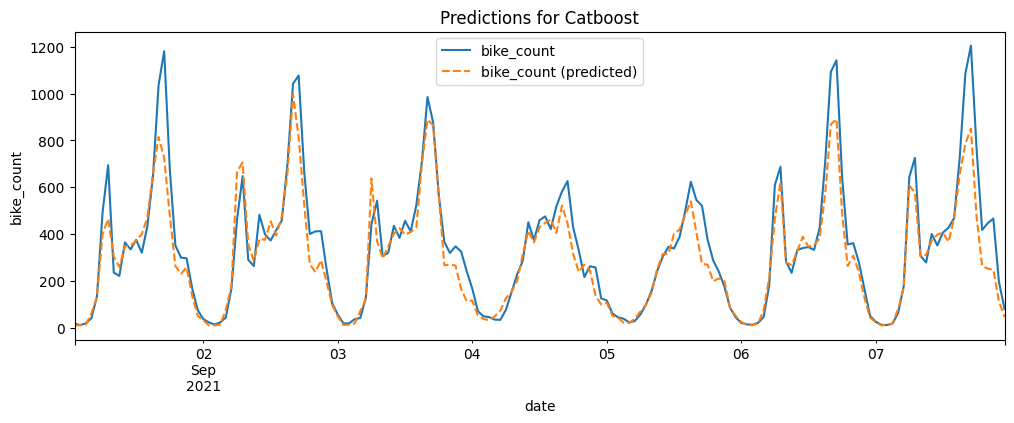

In [10]:
problem.week_plot(X_test, y_pred_test, y_test, "Catboost")

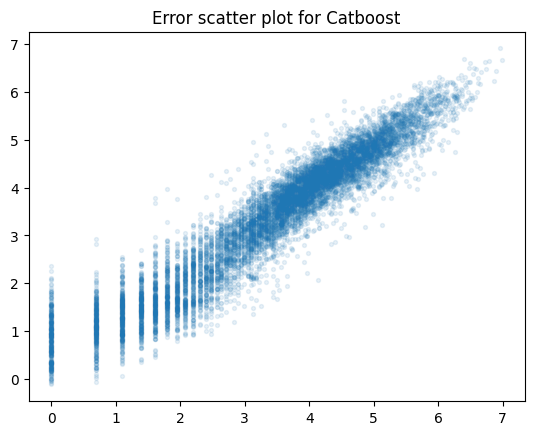

In [11]:
problem.error_plot(y_pred_test, y_test, "Catboost")